In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
import random

1. Plot the data in X and y using different symbols or colors for the two different classes.
Notice also that X1 and X2 are already normalized. Hence, no need for normalization in
this exercise

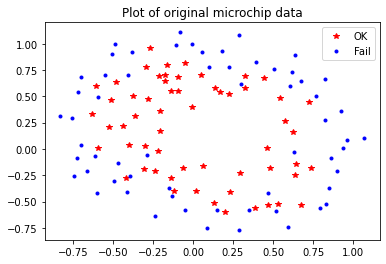

In [ ]:
data = pd.read_csv('/content/microchips.csv', header=None)
data = data.sample(frac=1).reset_index(drop=True)
data.columns = ['x','y','label']
label1 = data[data['label'] == 1]
label0 = data[data['label'] == 0]
plt.plot(label1['x'],label1['y'],'r*')
plt.plot(label0['x'],label0['y'],'b.')

plt.legend(["OK", "Fail"], loc ="upper right")
plt.title('Plot of original microchip data')
plt.show()

2. Use gradient descent to find beta in the case of a quadratic model.
2 :
Print the hyper parameters  and Niter, and produce a 12 plot with: 1) the cost function
as a function over iterations, 2) the corresponding decision boundary (together with
the X; y scatter plot), and 3) the number of training errors presented as a part of the
decision boundary plot title.

In [ ]:
dataset_X = pd.DataFrame({'X1' : data['x'],
                          'X2' : data['y'],
                          'X1^2' : data['x']**2,
                          'X1X2' : data['x']*data['y'],
                          'X2^2' : data['y']**2})
X_extended = pd.concat([pd.Series(1, index=dataset_X.index, name='00'), dataset_X], axis=1)

In [ ]:
def sigmoid(z):
  
    return 1/ (1 + np.exp(-z))

def costFunction(theta, X, y):

    m=len(y)    
    predictions = sigmoid(np.dot(X,theta))
    predictions = np.concatenate(predictions)
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = 1/m * sum(error)    
    grad = 1/m * np.dot(X.transpose(),(predictions - y))
    
    return cost , grad

def gradientDescent(X,y,theta,alpha,num_iters):

    m=len(y)
    J_history =[]
    
    for i in range(num_iters):

        cost, grad = costFunction(theta,X,y)
        theta1 = np.concatenate(theta) - (alpha * grad).T
        theta = np.array(theta1).reshape((n,1))
        J_history.append(cost)
    
    return theta , J_history

def classifierPredict(theta,X):
    predictions = X.dot(theta)       
    pred = predictions>0
    pred = pred.astype(int)

    return pred

In [ ]:
m , n = X_extended.shape[0], X_extended.shape[1]
initial_theta = np.zeros((n,1))
epochs = 20000
lr = 0.01
theta, cost_hist= gradientDescent(X_extended,data['label'],initial_theta,lr,epochs)
print("Hyperparameters :\n-Alpha(learning rate) : {}\n-Niter(number of iterations) : {}".format(lr,epochs))
print("Theta : ",np.concatenate(theta))


pred =classifierPredict(theta, X_extended)
count_ = sum(np.concatenate(np.array(pred)) == np.array( data['label']))
tr_acc = (count_ / len(pred)) * 100
tr_err = len(pred) - count_
print("Train Accuracy : ", tr_acc)
print("Train error : ", tr_err)


Hyperparameters :
-Alpha(learning rate) : 0.01
-Niter(number of iterations) : 20000
Theta :  [ 1.87914356  0.77404934  1.2028264  -4.4459698  -1.71428986 -3.8858773 ]
Train Accuracy :  78.8135593220339
Train error :  25


In [ ]:
xx, yy = np.meshgrid(np.arange(-1, 1.5, 0.01), np.arange(-1, 1.5, 0.01))
points = np.c_[xx.ravel(), yy.ravel()]
points_dataset = pd.DataFrame({
    'X1' : points[:,0],
    'X2' : points[:,1],
    'X1^2' : points[:,0]**2,
    'X1X2' : points[:,0]*points[:,1],
    'X2^2' : points[:,1]**2
})
Points_extended = pd.concat([pd.Series(1, index=points_dataset.index, name='00'), points_dataset], axis=1)

points_pred = classifierPredict(theta, Points_extended)
Z = np.array(points_pred).reshape(xx.shape)

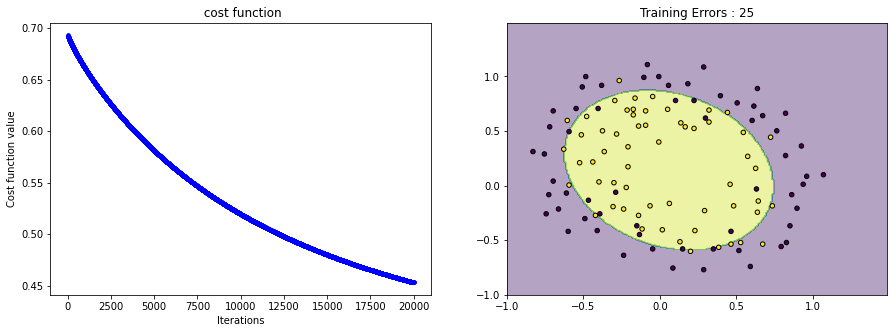

In [ ]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(0, len(cost_hist)), cost_hist,'b.')
plt.title(" cost function")
plt.xlabel("Iterations")
plt.ylabel("Cost function value")

plt.subplot(1,2,2)
plt.contourf(xx, yy, Z,alpha=0.4)
plt.scatter(data['x'], data['y'], c = data['label'], s = 20, edgecolor='k')
t = "Training Errors : "+str(tr_err) 
plt.title(t)
plt.show()



3. In this the final part of this exercise and upcoming exercises we will consider polynomial
expressions of the features in logistic regression. Implement a method called mapFeatures.
That is a function that takes two features X1, X2 and a degree d as input and outputs all
combinations of polynomial terms of degree less than or equal to d of the variables X1 and
X2. Suggestions for how to do it are presented in the lecture slides.

In [ ]:
def mapFeature(X1,X2,D): 
  one = np.ones([len(X1),1])
  Xe = np.c_[one,X1,X2] 
  for i in range(2,D+1):
    for j in range(0,i+1):
      Xnew = X1**(i-j)*X2**j 
      Xnew = Xnew.reshape(-1,1) 
      Xe = np.append(Xe,Xnew,1)
  return Xe

4. Use mapFeatures to repeat 2) but with a polynomial of degree five (d = 5) model

In [ ]:
X_e = pd.DataFrame(mapFeature(np.array(data['x']),np.array(data['y']),5)) 
m , n = X_e.shape[0], X_e.shape[1]
initial_theta = np.zeros((n,1))
epochs = 20000
lr = 0.01
theta, cost_hist= gradientDescent(X_e,data['label'],initial_theta,lr,epochs)
print("Hyperparameters :\n-Alpha(learning rate) : {}\n-Niter(number of iterations) : {}".format(lr,epochs))
print("Theta : ",np.concatenate(theta))


pred =classifierPredict(theta, X_e)
count_ = sum(np.concatenate(np.array(pred)) == np.array( data['label']))
tr_acc = (count_ / len(pred)) * 100
tr_err = len(pred) - count_
print("Train Accuracy : ", tr_acc)
print("Train error : ", tr_err)


Hyperparameters :
-Alpha(learning rate) : 0.01
-Niter(number of iterations) : 20000
Theta :  [ 1.90717883  1.17309478  2.06657076 -3.39319233 -1.63994891 -2.35459902
  0.18522906 -0.66439273 -0.60818475 -0.4580953  -2.68130191 -0.12098778
 -1.04408322 -0.49051481 -2.31766281 -0.53597592 -0.39509172 -0.07728263
 -0.49350383 -0.52182045 -1.10934372]
Train Accuracy :  82.20338983050848
Train error :  21


In [ ]:
xx, yy = np.meshgrid(np.arange(-1, 1.5, 0.01), np.arange(-1, 1.5, 0.01))
points = np.c_[xx.ravel(), yy.ravel()]
points_e = pd.DataFrame(mapFeature(np.array(points[:,0]),np.array(points[:,1]),5)) 

points_pred = classifierPredict(theta, points_e)
Z = np.array(points_pred).reshape(xx.shape)

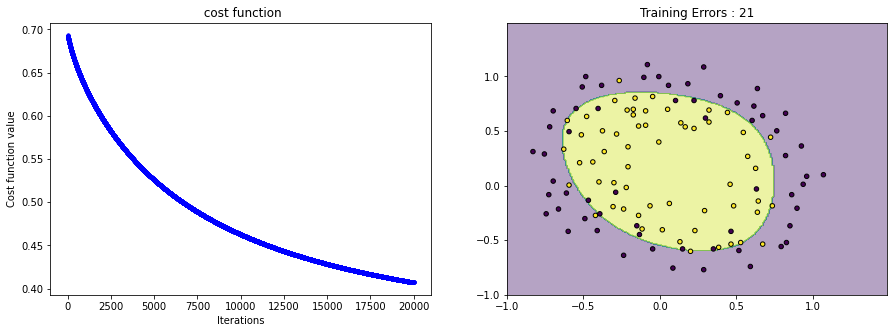

In [ ]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(0, len(cost_hist)), cost_hist,'b.')
plt.title(" cost function")
plt.xlabel("Iterations")
plt.ylabel("Cost function value")

plt.subplot(1,2,2)
plt.contourf(xx, yy, Z,alpha=0.4)
plt.scatter(data['x'], data['y'], c = data['label'], s = 20, edgecolor='k')
t = "Training Errors : "+str(tr_err) 
plt.title(t)
plt.show()
